<a href="https://colab.research.google.com/github/khushimusterya/Prodigytech_task1/blob/main/Email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Khushi Musterya  
Task 1

SMS Classifier :
Develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import datetime as dt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter

In [2]:
data = pd.read_csv("/content/spam (3).csv", encoding ='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

DATA CLEANING

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [8]:
data.sample(5)

,v1,v2
3212,ham,What's ur pin?
1377,spam,Double Mins & Double Txt & 1/2 price Linerenta...
3341,ham,You will go to walmart. I.ll stay.
3420,spam,Welcome! Please reply with your AGE and GENDER...
2622,ham,Ok lor...


In [9]:
#renaming the columns
data.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
data['Target'] = encoder.fit_transform(data['Target'])

In [12]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# check duplicate values
data.duplicated().sum()

403

In [15]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

EDA [ EXPLORING DATA ]

In [19]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

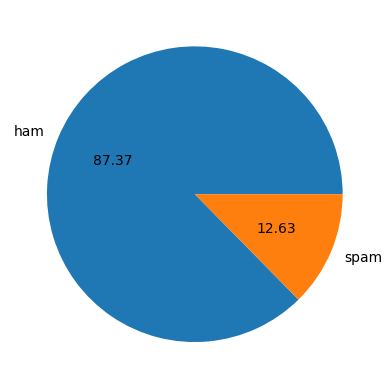

In [21]:
plt.pie(data['Target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Here, it is seen that a big chunk of ham and very less spam so out data is not balanced

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
data['num_characters'] = data['Text'].apply(len)  #num of char

<ipython-input-25-321aa3e5aa85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['Text'].apply(len)  #num of char


In [26]:
data.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words
data['num_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

<ipython-input-27-e14bdc7460a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count


In [28]:
data.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
data['num_sentences'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-29-3ba4a6a338c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [30]:
data.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [31]:
data[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [32]:
#targeting ham
data[data['Target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [33]:
#targeting spam
data[data['Target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

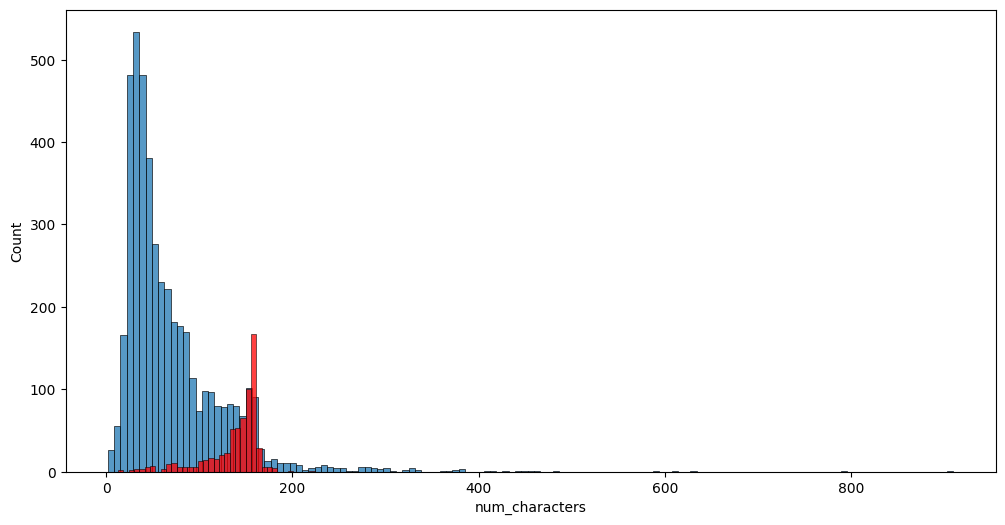

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target'] == 0]['num_characters'])
sns.histplot(data[data['Target'] == 1]['num_characters'], color='red')

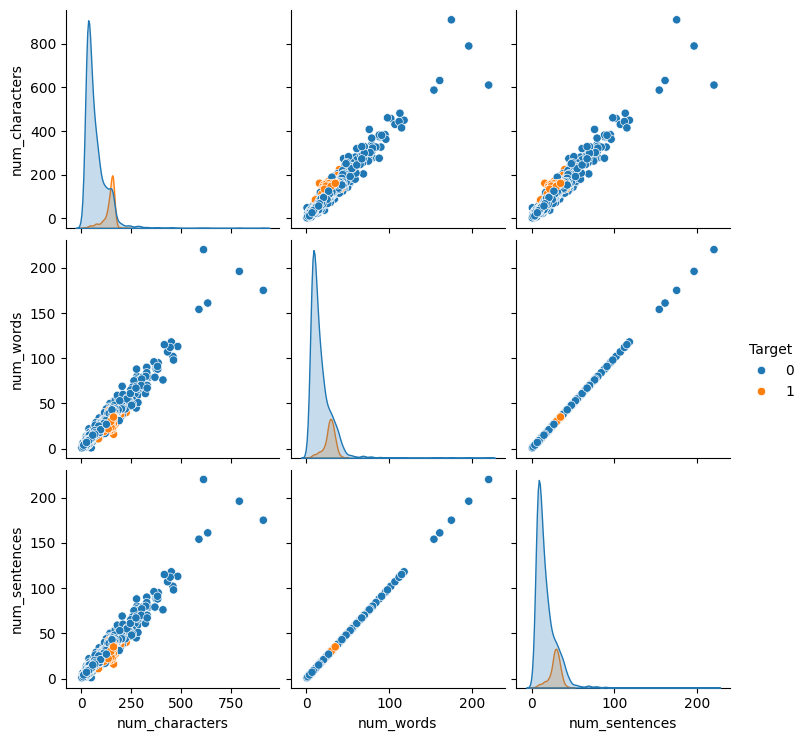

In [35]:
sns.pairplot(data,hue='Target')

<ipython-input-36-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

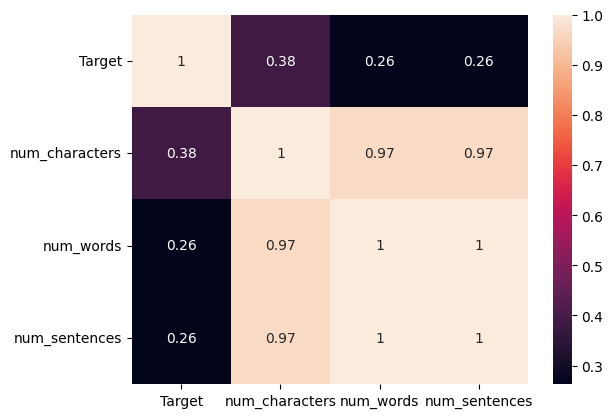

In [36]:
sns.heatmap(data.corr(),annot=True)

DATA PREPROCESSING

-LOWERCASE  
-TOKENIZATION  
-REMOVING SPECIAL CHARACTERS  
-REMOVING STOP WORDS AND PUNCTUATION  
-STEMMING

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [38]:
nltk.download('stopwords')  #You may need to download the stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
ps = PorterStemmer()

In [40]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

      text = y[:]
      y.clear()

      for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

      text = y[:]
      y.clear()

      for i in text:
        y.append(ps.stem(i))

      return " ". join(y)


transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff")

print(transformed_text)


In [41]:
data['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [43]:
data['transformed_text'] = data['Text'].apply(transform_text)

<ipython-input-43-743319180d5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['Text'].apply(transform_text)


In [44]:
data.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(data[data['Target']==1]['transformed_text'].str.cat(sep=" "))

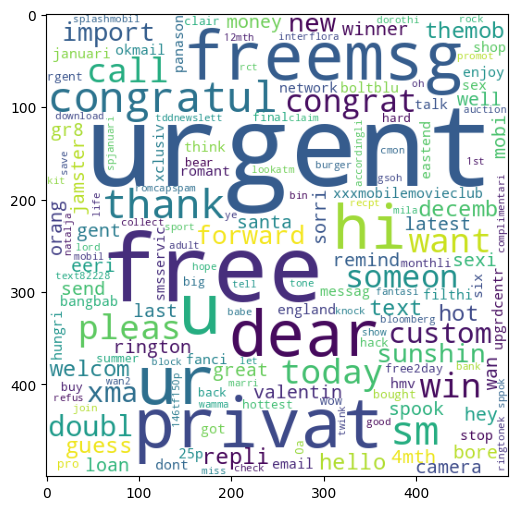

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(data[data['Target']==1]['transformed_text'].str.cat(sep=" "))

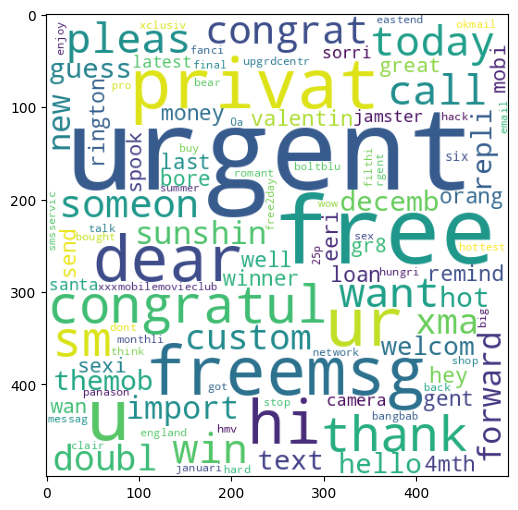

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
data.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


In [51]:
spam_corpus =[]
for msg in data[data['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [52]:
len(spam_corpus)

501

In [53]:
most_common_words = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

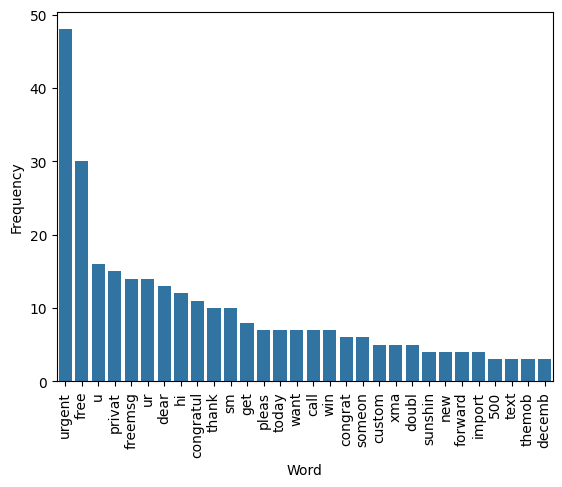

In [54]:
sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus =[]
for msg in data[data['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [56]:
len(ham_corpus)

501

In [57]:
most_common_words = Counter(ham_corpus).most_common(30)
df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

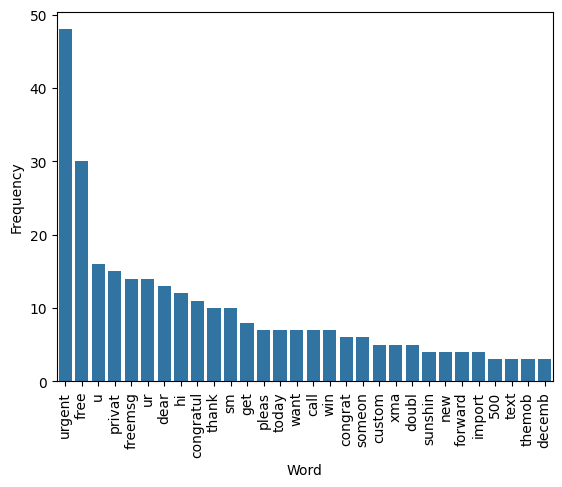

In [59]:
sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
# Print the data frame columns
print(df.columns)

Index(['Word', 'Frequency'], dtype='object')


In [61]:
data.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go
1,0,Ok lar... Joking wif u oni...,29,8,8,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free
3,0,U dun say so early hor... U c already then say...,49,13,13,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah


BUILDING THE MODEL

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [63]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Target            5169 non-null   int64 
 1   Text              5169 non-null   object
 2   num_characters    5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   num_sentences     5169 non-null   int64 
 5   transformed_text  5164 non-null   object
dtypes: int64(4), object(2)
memory usage: 411.7+ KB
None


In [64]:
print(data['transformed_text'].head())

0      go
1      ok
2    free
3       u
4     nah
Name: transformed_text, dtype: object


In [65]:
print(data['transformed_text'].isnull().sum())

5


In [66]:
!pip install text-unidecode
import text_unidecode

data['transformed_text'] = data['transformed_text'].apply(lambda x: text_unidecode.unidecode(str(x)))

<ipython-input-66-9858071e0e89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['transformed_text'].apply(lambda x: text_unidecode.unidecode(str(x)))


In [67]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

In [68]:
x.shape

(5169, 868)

In [69]:
y = data['Target'].values

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [73]:
!pip show sklearn

In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [77]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.3617021276595745
[[241 655]
 [  5 133]]
0.16878172588832488


In [78]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.902321083172147
[[895   1]
 [100  38]]
0.9743589743589743


In [79]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8916827852998066
[[895   1]
 [111  27]]
0.9642857142857143


In [80]:
!pip install xgboost

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT': dtc,
    'LR' : lrc,
    'RF': rfc,
    'Adaboost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
    }

In [84]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision


In [86]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.90715667311412, 0.9565217391304348)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

For  SVC
Accuracy -  0.90715667311412
Precision -  0.9565217391304348
For  KN
Accuracy -  0.902321083172147
Precision -  0.9111111111111111
For  NB
Accuracy -  0.902321083172147
Precision -  0.9743589743589743
For  DT
Accuracy -  0.8907156673114119
Precision -  0.9629629629629629
For  LR
Accuracy -  0.9013539651837524
Precision -  0.95
For  RF
Accuracy -  0.9168278529980658
Precision -  0.9482758620689655
For  Adaboost
Accuracy -  0.9081237911025145
Precision -  0.9574468085106383
For  BgC
Accuracy -  0.9168278529980658
Precision -  0.9482758620689655
For  ETC
Accuracy -  0.9177949709864603
Precision -  0.9491525423728814
For  GBDT
Accuracy -  0.8994197292069632
Precision -  0.9722222222222222
For  xgb
Accuracy -  0.8984526112185687
Precision -  0.9714285714285714


In [90]:
accuracy_scores.append(current_accuracy)

In [91]:
precision_scores.append(current_precision)

In [95]:
# Assuming clfs is a dictionary containing keys as algorithm names and values as classifier objects
# accuracy_scores is a list containing accuracy scores corresponding to each algorithm
# precision is a list containing precision scores corresponding to each algorithm

# Ensure all arrays have the same length
min_length = min(len(clfs.keys()), len(accuracy_scores), len(precision))

# Create DataFrame with arrays truncated to the minimum length
performance_data = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_length],
    'Accuracy': accuracy_scores[:min_length],
    'Precision': precision[:min_length]
}).sort_values('Precision', ascending=False)




In [97]:
print(len(clfs.keys()))
print(len(precision_scores))

11
1


In [98]:
print(clfs)
print(precision_scores)

{'SVC': SVC(gamma=1.0, kernel='sigmoid'), 'KN': KNeighborsClassifier(), 'NB': MultinomialNB(), 'DT': DecisionTreeClassifier(max_depth=5), 'LR': LogisticRegression(penalty='l1', solver='liblinear'), 'RF': RandomForestClassifier(n_estimators=50, random_state=2), 'Adaboost': AdaBoostClassifier(random_state=2), 'BgC': BaggingClassifier(n_estimators=50, random_state=2), 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2), 'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2), 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
          

In [100]:
performance_data = performance_data.sort_values('Precision', ascending=False)
print(performance_data)

  Algorithm  Accuracy  Precision
0       SVC  0.898453       0.85


In [101]:
performance_data

,Algorithm,Accuracy,Precision
0,SVC,0.898453,0.85


In [102]:
performance_data = pd.melt(performance_data,id_vars = "Algorithm")

In [103]:
performance_data

,Algorithm,variable,value
0,SVC,Accuracy,0.898453
1,SVC,Precision,0.850000


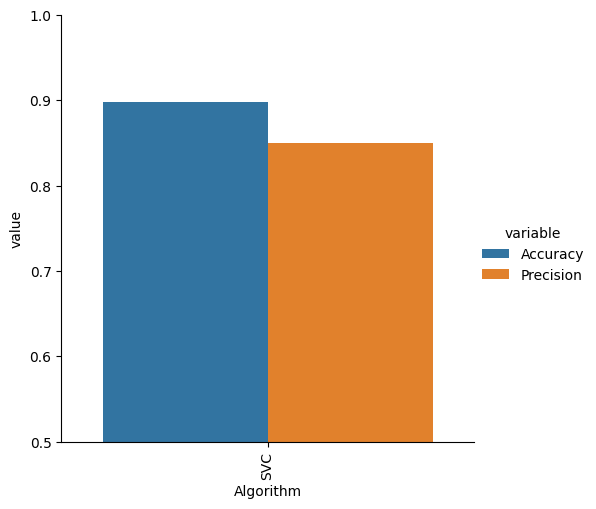

In [107]:
sns.catplot(x='Algorithm', y='value',
              hue = 'variable', data=performance_data,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Model Improve

In [111]:
print(clfs.keys())
print(accuracy_scores)
print(precision_scores)

dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'Adaboost', 'BgC', 'ETC', 'GBDT', 'xgb'])
[0.8984526112185687]
[0.9714285714285714]


In [112]:
print(len(clfs.keys()))
print(len(accuracy_scores))
print(len(precision_scores))

11
1
1


In [114]:
# Assuming clfs is a dictionary containing keys as algorithm names and values as classifier objects
# accuracy_scores is a list containing accuracy scores corresponding to each algorithm
# precision_scores is a list containing precision scores corresponding to each algorithm

# Find the minimum length among all arrays
min_length = min(len(clfs.keys()), len(accuracy_scores), len(precision_scores))

# Create DataFrame with arrays truncated to the minimum length
temp_data = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_length],
    'Accuracy_max_ft_3000': accuracy_scores[:min_length],
    'Precision_max_ft_3000': precision_scores[:min_length]
})


In [116]:
# Assuming clfs is a dictionary containing keys as algorithm names and values as classifier objects
# accuracy_scores is a list containing accuracy scores corresponding to each algorithm
# precision_scores is a list containing precision scores corresponding to each algorithm

# Find the minimum length among all arrays
min_length = min(len(clfs.keys()), len(accuracy_scores), len(precision_scores))

# Create DataFrame with arrays truncated to the minimum length
temp_data = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_length],
    'Accuracy_num_chars': accuracy_scores[:min_length],
    'Precision_num_chars': precision_scores[:min_length]
})


In [118]:
print(temp_data)

  Algorithm  Accuracy_num_chars  Precision_num_chars
0       SVC            0.898453             0.971429
